In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [3]:
df_input = pd.read_csv("../datasets/API_Download_DS2_en_csv_v2_5585110.csv", skiprows=4)

df_input.head().round(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Brunei Darussalam,BRN,"Intentional homicides, male (per 100,000 male)",VC.IHR.PSRC.MA.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,BRN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Brunei Darussalam,BRN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,25.8,21.7,20.7,14.8,13.8,17.4,14.5,15.5,18.8,NaN
3,Brunei Darussalam,BRN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.2,23.4,28.3,33.3,34.5,36.2,11.3,1.1,NaN
4,Brunei Darussalam,BRN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,492589892.5,556811340.2,629168302.5,508597351.5,532978909.6,551279400.7,599016804.3,332555667.2,181402135.2,NaN


In [4]:
column_code = ["SP.POP.TOTL", "EN.POP.DNST", "NY.GDP.MKTP.KD", "NE.IMP.GNFS.ZS", "NE.EXP.GNFS.ZS", "SL.UEM.TOTL.ZS", "FP.CPI.TOTL.ZG", "BX.KLT.DINV.WD.GD.ZS"]

df_filter = df_input[df_input["Indicator Code"].isin(column_code)].reset_index(drop=True)
df_filter.head().round(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Brunei Darussalam,BRN,"Population, total",SP.POP.TOTL,85346.0,89561.0,93837.0,98277.0,102904.0,107686.0,...,411702.0,416656.0,421437.0,425994.0,430276.0,434274.0,438048.0,441725.0,445373.0,NaN
1,Brunei Darussalam,BRN,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,68.2,52.2,49.6,49.6,51.9,57.9,57.4,80.2,NaN
2,Brunei Darussalam,BRN,GDP (constant 2015 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,13315326918.0,12981331573.0,12930394938.0,12609990391.0,12777527045.0,12784201743.0,13278836553.0,13429361906.0,13215732655.0,NaN
3,Brunei Darussalam,BRN,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.8,6.9,7.7,8.4,9.3,8.7,6.9,7.4,7.4,7.2
4,Brunei Darussalam,BRN,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.3,3.4,1.3,-1.3,3.9,3.8,2.8,4.7,1.5,NaN


In [5]:
df_filter.shape

(128, 67)

In [10]:
df_ts = df_filter.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
df_ts = df_ts.pivot_table(index=['Country Name', 'Country Code', "Year"], columns='Indicator Name', values='Value').reset_index()

df_ts.head().round(1)

Indicator Name,Country Name,Country Code,Year,Exports of goods and services (% of GDP),"Foreign direct investment, net inflows (% of GDP)",GDP (constant 2015 US$),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)",Population density (people per sq. km of land area),"Population, total","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Brunei Darussalam,BRN,1960,NaN,NaN,NaN,NaN,NaN,NaN,85346.0,NaN
1,Brunei Darussalam,BRN,1961,NaN,NaN,NaN,NaN,NaN,17.0,89561.0,NaN
2,Brunei Darussalam,BRN,1962,NaN,NaN,NaN,NaN,NaN,17.8,93837.0,NaN
3,Brunei Darussalam,BRN,1963,NaN,NaN,NaN,NaN,NaN,18.6,98277.0,NaN
4,Brunei Darussalam,BRN,1964,NaN,NaN,NaN,NaN,NaN,19.5,102904.0,NaN


In [11]:
df_ts.columns = ["Country", "Country Code", "Year", "Exports (% of GDP)", "FDI (% of GDP)", "GDP (USD)", "Imports (% of GDP)", "Inflation (%)", "Density (p/km2)", "Population", "Unemployment (% of total labor force)"]

df_ts.head()

,Country,Country Code,Year,Exports (% of GDP),FDI (% of GDP),GDP (USD),Imports (% of GDP),Inflation (%),Density (p/km2),Population,Unemployment (% of total labor force)
0,Brunei Darussalam,BRN,1960,NaN,NaN,NaN,NaN,NaN,NaN,85346.0,NaN
1,Brunei Darussalam,BRN,1961,NaN,NaN,NaN,NaN,NaN,17.0,89561.0,NaN
2,Brunei Darussalam,BRN,1962,NaN,NaN,NaN,NaN,NaN,17.8,93837.0,NaN
3,Brunei Darussalam,BRN,1963,NaN,NaN,NaN,NaN,NaN,18.6,98277.0,NaN
4,Brunei Darussalam,BRN,1964,NaN,NaN,NaN,NaN,NaN,19.5,102904.0,NaN


In [12]:
df_ts.shape

(1007, 11)

In [13]:
df_ts.dtypes

Country                                   object
Country Code                              object
Year                                      object
Exports (% of GDP)                       float64
FDI (% of GDP)                           float64
GDP (USD)                                float64
Imports (% of GDP)                       float64
Inflation (%)                            float64
Density (p/km2)                          float64
Population                               float64
Unemployment (% of total labor force)    float64
dtype: object

In [14]:
df_ts["Year"] = df_ts["Year"].astype(int)

df_ts.dtypes

Country                                   object
Country Code                              object
Year                                       int32
Exports (% of GDP)                       float64
FDI (% of GDP)                           float64
GDP (USD)                                float64
Imports (% of GDP)                       float64
Inflation (%)                            float64
Density (p/km2)                          float64
Population                               float64
Unemployment (% of total labor force)    float64
dtype: object

In [15]:
df_ts.isna().sum()

Country                                    0
Country Code                               0
Year                                       0
Exports (% of GDP)                       269
FDI (% of GDP)                           288
GDP (USD)                                178
Imports (% of GDP)                       269
Inflation (%)                            250
Density (p/km2)                           47
Population                                15
Unemployment (% of total labor force)    497
dtype: int64

In [16]:
df_ts = df_ts.drop(df_ts[df_ts["Year"]==2022].index)

df_ts.shape

(992, 11)

In [17]:
df_ts["Exports (% of GDP)"][df_ts["Year"]<=2000] = df_ts["Exports (% of GDP)"][df_ts["Year"]<=2000].fillna(0)
df_ts["Imports (% of GDP)"][df_ts["Year"]<=2000] = df_ts["Imports (% of GDP)"][df_ts["Year"]<=2000].fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1821210655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Exports (% of GDP)"][df_ts["Year"]<=2000] = df_ts["Exports (% of GDP)"][df_ts["Year"]<=2000].fillna(0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1821210655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Imports (% of GDP)"][df_ts["Year"]<=2000] = df_ts["Imports (% of GDP)"][df_ts["Year"]<=2000].fillna(0)


In [18]:
df_ts.isna().sum()

Country                                    0
Country Code                               0
Year                                       0
Exports (% of GDP)                        14
FDI (% of GDP)                           273
GDP (USD)                                163
Imports (% of GDP)                        14
Inflation (%)                            247
Density (p/km2)                           32
Population                                 0
Unemployment (% of total labor force)    497
dtype: int64

In [29]:
df_ts["Density (p/km2)"] = df_ts["Density (p/km2)"].fillna(method='ffill')
df_ts["Density (p/km2)"] = df_ts["Density (p/km2)"].fillna(method='bfill')

In [20]:
df_ts[df_ts["Imports (% of GDP)"].isna()]

,Country,Country Code,Year,Exports (% of GDP),FDI (% of GDP),GDP (USD),Imports (% of GDP),Inflation (%),Density (p/km2),Population,Unemployment (% of total labor force)
498,Lao PDR,LAO,2017,NaN,9.9,16503696158.0,NaN,0.8,30.3,6997917.0,3.3
499,Lao PDR,LAO,2018,NaN,7.5,17534840493.0,NaN,2.0,30.8,7105006.0,3.3
500,Lao PDR,LAO,2019,NaN,4.0,18491845636.0,NaN,3.3,31.2,7212053.0,3.3
501,Lao PDR,LAO,2020,NaN,5.1,18584865506.0,NaN,5.1,31.7,7319399.0,3.6
502,Lao PDR,LAO,2021,NaN,5.7,19054756139.0,NaN,3.8,31.7,7425057.0,3.6
608,Myanmar,MMR,2001,NaN,3.3,16287019890.0,NaN,21.1,70.4,46014826.0,0.7
609,Myanmar,MMR,2002,NaN,2.5,18193097258.0,NaN,57.1,71.1,46480230.0,0.7
610,Myanmar,MMR,2003,NaN,3.2,20555711976.0,NaN,36.6,71.8,46924293.0,0.7
611,Myanmar,MMR,2004,NaN,2.3,23370875796.0,NaN,4.5,72.4,47338446.0,0.7
612,Myanmar,MMR,2005,NaN,2.2,26541588962.0,NaN,9.4,73.0,47724471.0,0.7


In [21]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math
from sklearn.metrics import mean_squared_error

In [22]:
def linear_regression_2(x,y,x_for_pred) :
    x=np.array(x)
    x_=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x.reshape((-1, 1)))
    y=np.array(y)
    x_for_pred=np.array(x_for_pred).reshape((-1, 1))
    x_for_pred=PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_for_pred)
    
    model = LinearRegression().fit(x_, y)
    
    y_pred = model.predict( x_for_pred)
    y_pre_pred = model.predict(x_)
    pred_error=math.sqrt(mean_squared_error(y,y_pre_pred))/math.sqrt((max(y_pre_pred)-min(y_pre_pred))**2 +(max(x)-min(x))**2)
    return y_pred, y_pre_pred, pred_error

def linear_regression_3(x,y,x_for_pred) :
    x=np.array(x)
    x_=PolynomialFeatures(degree=3, include_bias=False).fit_transform(x.reshape((-1, 1)))
    y=np.array(y)
    x_for_pred=np.array(x_for_pred).reshape((-1, 1))
    x_for_pred=PolynomialFeatures(degree=3, include_bias=False).fit_transform(x_for_pred)
    
    model = LinearRegression().fit(x_, y)
    
    y_pred = model.predict( x_for_pred)
    y_pre_pred = model.predict(x_)
    pred_error=math.sqrt(mean_squared_error(y,y_pre_pred))/math.sqrt((max(y_pre_pred)-min(y_pre_pred))**2 +(max(x)-min(x))**2)
    return y_pred, y_pre_pred, pred_error

<AxesSubplot: xlabel='Year', ylabel='Imports (% of GDP)'>

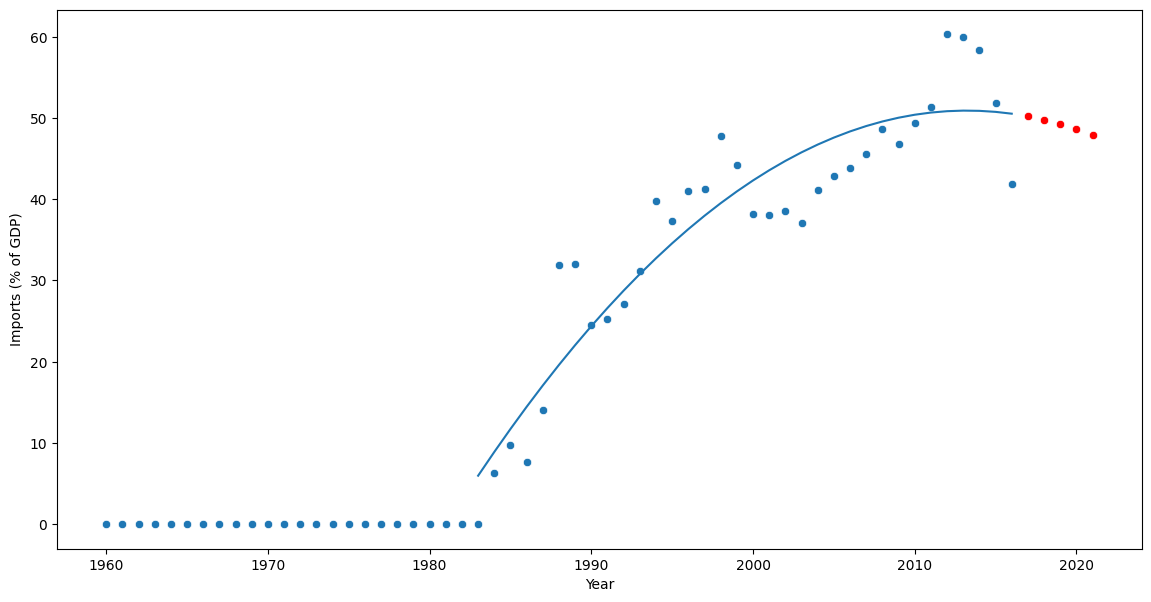

In [23]:
y_imp_pred, y_imp_model, imp_error = linear_regression_2(df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)].values,
                                            df_ts["Imports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)], 
                                            df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)])

plt.figure(figsize=(14,7))
sns.scatterplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]<2017)], 
                y=df_ts["Imports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]<2017)])
sns.lineplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)], y=y_imp_model)

sns.scatterplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)], y=y_imp_pred, c='red')

<AxesSubplot: xlabel='Year', ylabel='Exports (% of GDP)'>

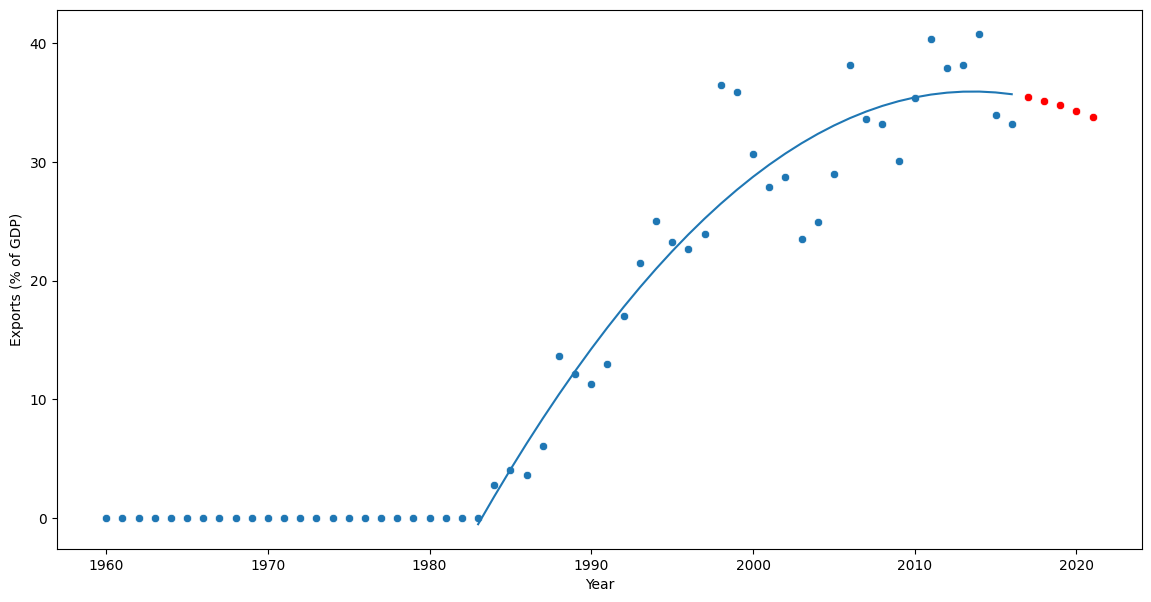

In [24]:
y_pred, y_model, error = linear_regression_2(df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)].values,
                                            df_ts["Exports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)], 
                                            df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)])

plt.figure(figsize=(14,7))
sns.scatterplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]<2017)], 
                y=df_ts["Exports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]<2017)])
sns.lineplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>1982) & (df_ts["Year"]<2017)], y=y_model)

sns.scatterplot(x=df_ts["Year"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)], y=y_pred, c='red')

In [25]:
df_ts["Exports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)] = y_pred
df_ts["Imports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)] = y_imp_pred

df_ts["Imports (% of GDP)"] = df_ts["Imports (% of GDP)"].fillna(0)
df_ts["Exports (% of GDP)"] = df_ts["Exports (% of GDP)"].fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\4182490335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Exports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)] = y_pred
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\4182490335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Imports (% of GDP)"].loc[(df_ts["Country"]=="Lao PDR") & (df_ts["Year"]>=2017)] = y_imp_pred


In [26]:
df_ts.loc[(df_ts["GDP (USD)"].isna()) & (df_ts["Year"]>2000)]

,Country,Country Code,Year,Exports (% of GDP),FDI (% of GDP),GDP (USD),Imports (% of GDP),Inflation (%),Density (p/km2),Population,Unemployment (% of total labor force)


In [27]:
df_ts["GDP (USD)"] = df_ts["GDP (USD)"].fillna(0)

In [30]:
df_ts.isna().sum()

Country                                    0
Country Code                               0
Year                                       0
Exports (% of GDP)                         0
FDI (% of GDP)                           273
GDP (USD)                                  0
Imports (% of GDP)                         0
Inflation (%)                            247
Density (p/km2)                            0
Population                                 0
Unemployment (% of total labor force)    497
dtype: int64

In [31]:
df_ts.loc[(df_ts["Inflation (%)"].isna())]

,Country,Country Code,Year,Exports (% of GDP),FDI (% of GDP),GDP (USD),Imports (% of GDP),Inflation (%),Density (p/km2),Population,Unemployment (% of total labor force)
0,Brunei Darussalam,BRN,1960,0.0,NaN,0.0,0.0,NaN,17.0,85346.0,NaN
1,Brunei Darussalam,BRN,1961,0.0,NaN,0.0,0.0,NaN,17.0,89561.0,NaN
2,Brunei Darussalam,BRN,1962,0.0,NaN,0.0,0.0,NaN,17.8,93837.0,NaN
3,Brunei Darussalam,BRN,1963,0.0,NaN,0.0,0.0,NaN,18.6,98277.0,NaN
4,Brunei Darussalam,BRN,1964,0.0,NaN,0.0,0.0,NaN,19.5,102904.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
975,Vietnam,VNM,1991,30.9,3.9,47743816570.0,36.0,NaN,210.0,68358820.0,2.1
976,Vietnam,VNM,1992,34.7,4.8,51871769610.0,38.8,NaN,214.4,69788747.0,1.9
977,Vietnam,VNM,1993,28.7,7.0,56059237858.0,37.5,NaN,218.7,71176405.0,2.0
978,Vietnam,VNM,1994,34.0,11.9,61014303214.0,43.5,NaN,222.7,72501087.0,1.9


In [32]:
df_ts["FDI (% of GDP)"][df_ts["Year"]<=2002] = df_ts["FDI (% of GDP)"][df_ts["Year"]<=2002].fillna(0)
df_ts["FDI (% of GDP)"][df_ts["Year"]>2002] = df_ts["FDI (% of GDP)"][df_ts["Year"]>2002].fillna(method='ffill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1803832241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["FDI (% of GDP)"][df_ts["Year"]<=2002] = df_ts["FDI (% of GDP)"][df_ts["Year"]<=2002].fillna(0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1803832241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["FDI (% of GDP)"][df_ts["Year"]>2002] = df_ts["FDI (% of GDP)"][df_ts["Year"]>2002].fillna(method='ffill')


In [33]:
df_ts.isna().sum()

Country                                    0
Country Code                               0
Year                                       0
Exports (% of GDP)                         0
FDI (% of GDP)                             0
GDP (USD)                                  0
Imports (% of GDP)                         0
Inflation (%)                            247
Density (p/km2)                            0
Population                                 0
Unemployment (% of total labor force)    497
dtype: int64

In [34]:
df_ts.loc[(df_ts["Inflation (%)"].isna()) & (df_ts["Year"]>1996)]

,Country,Country Code,Year,Exports (% of GDP),FDI (% of GDP),GDP (USD),Imports (% of GDP),Inflation (%),Density (p/km2),Population,Unemployment (% of total labor force)
627,Myanmar,MMR,2020,28.7,2.4,86343026585.0,26.5,NaN,81.9,53423198.0,1.5
628,Myanmar,MMR,2021,28.3,3.2,70876447891.0,24.8,NaN,81.9,53798084.0,NaN
855,Timor-Leste,TLS,1997,0.0,0.0,0.0,0.0,NaN,56.7,843341.0,3.6
856,Timor-Leste,TLS,1998,0.0,0.0,0.0,0.0,NaN,57.5,855409.0,3.7
857,Timor-Leste,TLS,1999,0.0,0.0,0.0,0.0,NaN,58.3,866649.0,4.0
858,Timor-Leste,TLS,2000,10.6,0.0,832710142.7,164.9,NaN,59.1,878360.0,3.4
859,Timor-Leste,TLS,2001,9.0,0.0,968839033.3,157.7,NaN,60.1,893001.0,3.4
860,Timor-Leste,TLS,2002,7.8,0.0,903920093.6,172.6,NaN,61.2,909639.0,3.6
878,Timor-Leste,TLS,2020,36.7,3.4,2585667331.0,48.1,NaN,87.4,1299995.0,4.8
879,Timor-Leste,TLS,2021,63.9,1.9,2722486416.0,36.3,NaN,87.4,1320942.0,5.0


<AxesSubplot: xlabel='Year', ylabel='Inflation (%)'>

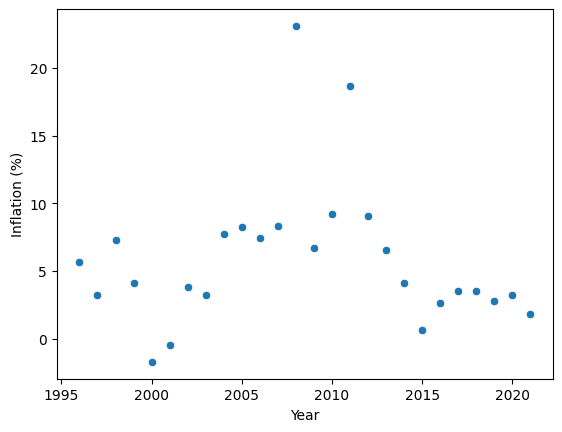

In [35]:
sns.scatterplot(df_ts[df_ts["Country"]=="Vietnam"], x="Year", y="Inflation (%)")

In [36]:
df_ts["Inflation (%)"][df_ts["Year"]<2017] = df_ts["Inflation (%)"][df_ts["Year"]<2017].fillna(0)

for i in df_ts["Country"].unique():
    df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)] = df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)].fillna(df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)].median())

C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\2530881290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Inflation (%)"][df_ts["Year"]<2017] = df_ts["Inflation (%)"][df_ts["Year"]<2017].fillna(0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\2530881290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)] = df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)].fillna(df_ts["Inflation (%)"].loc[(df_ts["Country"]==i) & (df_ts["Year"]>=2017)].median())
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\2530881290.py:

In [37]:
df_ts.isna().sum()

Country                                    0
Country Code                               0
Year                                       0
Exports (% of GDP)                         0
FDI (% of GDP)                             0
GDP (USD)                                  0
Imports (% of GDP)                         0
Inflation (%)                              0
Density (p/km2)                            0
Population                                 0
Unemployment (% of total labor force)    497
dtype: int64

In [38]:
df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]<=2010)] = df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]<2017)].fillna(0)

df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]>2010)] = df_ts["Unemployment (% of total labor force)"][df_ts["Year"]>=2017].fillna(method='bfill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1520944130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]<2017)] = df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]<2017)].fillna(0)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20988\1520944130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts["Unemployment (% of total labor force)"].loc[(df_ts["Unemployment (% of total labor force)"].isna()) & (df_ts["Year"]>=201

In [39]:
df_ts.isna().sum()

Country                                  0
Country Code                             0
Year                                     0
Exports (% of GDP)                       0
FDI (% of GDP)                           0
GDP (USD)                                0
Imports (% of GDP)                       0
Inflation (%)                            0
Density (p/km2)                          0
Population                               0
Unemployment (% of total labor force)    0
dtype: int64

In [40]:
df_ts.to_csv("../datasets/economy_asia_countries.csv")